In [2]:
import os
os.chdir( "/home/lucasfuzato/CODING/WINE" )

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sklearn.decomposition as dcomp
from src.aux_fun import smote_supersampling

#---------------------------------------------------
# Basic data
data = pd.read_csv( "DATA/winequality.csv" ).to_numpy()
X = data[ : , :-1 ]
y = data[ : , -1  ]

#--------------------------------------------------
# normalized data
mu = X.mean( axis = 0 )
sigma = X.std( axis = 0 )
norm_X = ( X - mu )/sigma

#-------------------------------
# printing
foo = lambda x : f"{ x[ 0 ]:.2f} { x[ 1 ]:.2f} ... { x[ -1 ]:.2f}"
bar = lambda i : f"{ i } | { foo( norm_X[ i ] ) } | { y[ i ] }"
for i in range( 20 ):
    print( bar( i ))

0 | -0.57 -0.17 ... -1.42 | 0.0
1 | -0.57 -0.71 ... -0.83 | 0.0
2 | -0.57 0.68 ... -0.33 | 0.0
3 | -0.57 -0.01 ... -0.50 | 0.0
4 | 1.75 0.14 ... -0.92 | 0.0
5 | 1.75 0.45 ... -0.58 | 0.0
6 | -0.57 -0.01 ... -0.50 | 0.0
7 | -0.57 0.68 ... -0.33 | 0.0
8 | 1.75 0.45 ... -0.58 | 0.0
9 | -0.57 -0.78 ... -0.75 | 0.0
10 | -0.57 -0.17 ... -1.42 | 0.0
11 | -0.57 -0.71 ... -0.83 | 0.0
12 | -0.57 0.68 ... 0.43 | 0.0
13 | -0.57 0.68 ... 1.26 | 0.0
14 | -0.57 1.07 ... -0.66 | 0.0
15 | -0.57 0.53 ... 0.26 | 0.0
16 | 1.75 3.07 ... -0.58 | 0.0
17 | -0.57 -0.47 ... 1.60 | 1.0
18 | -0.57 0.84 ... -0.66 | 0.0
19 | -0.57 -0.47 ... 0.76 | 1.0


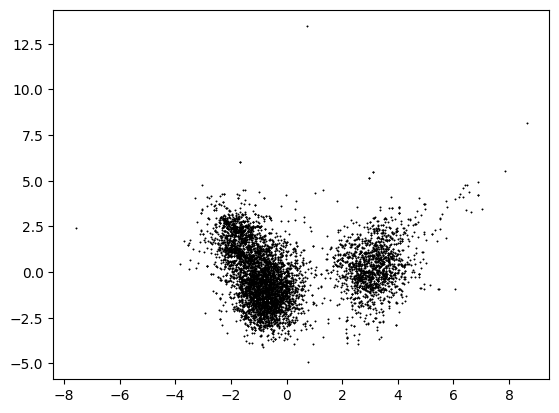

In [3]:
# pca = dcomp.PCA( 2 ).fit( norm_X[ : , 1: ] )
# X_2d = pca.transform( norm_X[ : , 1: ] ).T

pca = dcomp.PCA( 2 ).fit( norm_X )
X_2d = pca.transform( norm_X ).T
xs = X_2d[ 0 ]
ys = X_2d[ 1 ]

_ , ax = plt.subplots( )
ax.plot( xs , ys , "*k" , markersize = .8 )
# ax.axis('equal')
plt.show()

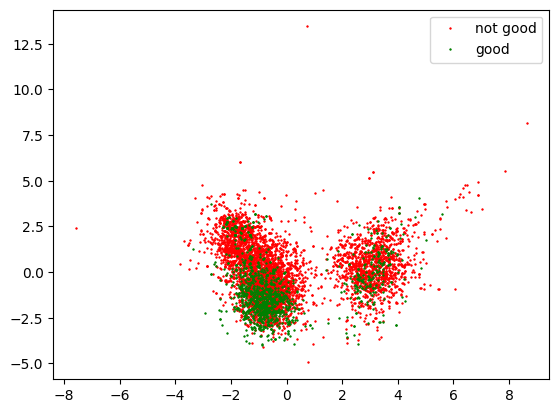

In [4]:
# _ , ax = plt.subplots( ncols = 2 , sharey = True )

labels = ["not good" , "good" ]
formats = [ "+r" , "+g"]
for i in range( 2 ):

    where = ( y == i )
    x_pt = xs[ where ]
    y_pt = ys[ where ]

    plt.plot( x_pt , y_pt , formats[ i ] , label = labels[ i ] , markersize = .8 )
    # ax[ i ].plot( x_pt , y_pt , formats[ i ] , label = labels[ i ] , markersize = .8 )

plt.legend()
plt.show()

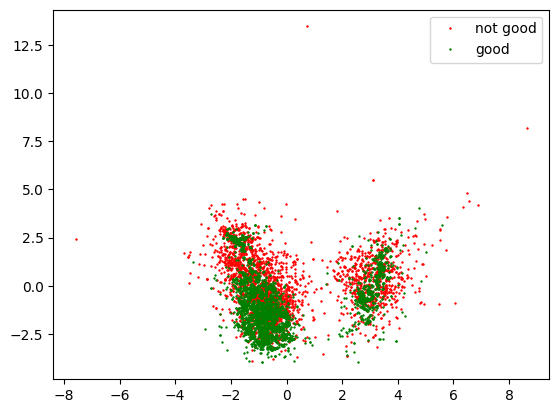

In [5]:

np.random.seed( 35 )
new_X , new_y = smote_supersampling( X_2d.T , y , n_ngh = 10 )
xs = new_X.T[ 0 ]
ys = new_X.T[ 1 ]

for i in range( 2 ):

    where = ( new_y == i )
    x_pt = xs[ where ]
    y_pt = ys[ where ]

    plt.plot( x_pt , y_pt , formats[ i ] , label = labels[ i ] , markersize = .8 )
    # ax[ i ].plot( x_pt , y_pt , formats[ i ] , label = labels[ i ] , markersize = .8 )

plt.legend()
plt.show()